___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 9ms/step - loss: 0.7109 - accuracy: 0.5791
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.5885
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5922
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5996
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6071
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6145
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.6220
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6220
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6294
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.6369
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.7709
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7709
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7709
Epoch 87/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7728
Epoch 88/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7728
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7728
Epoch 90/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7728
Epoch 91/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7728
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7728
Epoch 93/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7728
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7896
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7896
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7896
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7896
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7896
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7896
Epoch 173/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7896
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7896
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.7896
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7896
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

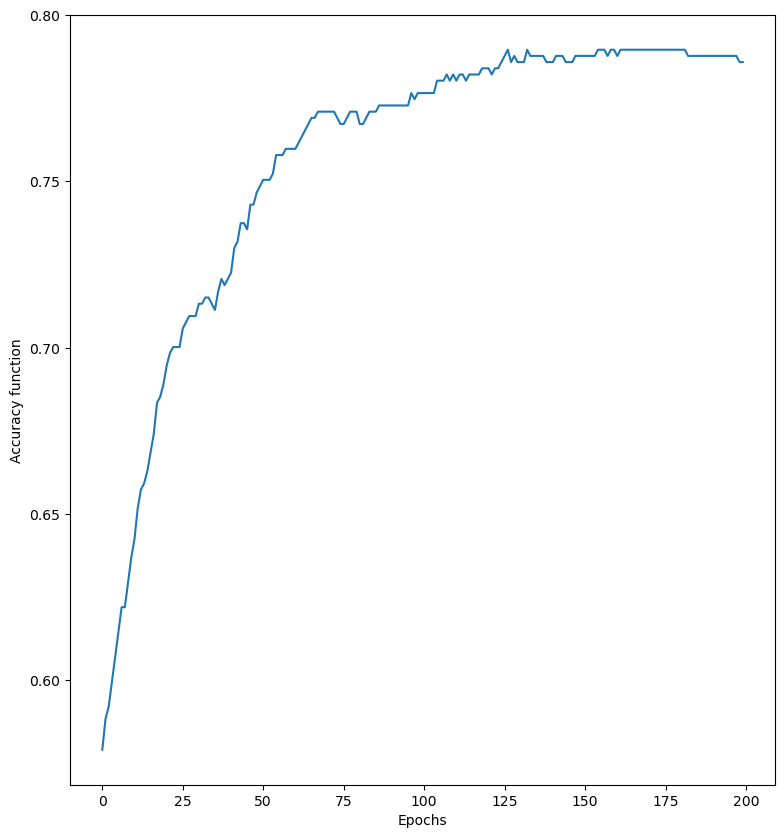

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 1ms/step


In [10]:
Y_pred

array([[0.30311325],
       [0.1649734 ],
       [0.10467517],
       [0.16858189],
       [0.530239  ],
       [0.50744206],
       [0.03195948],
       [0.59224844],
       [0.59724987],
       [0.8385184 ],
       [0.2322921 ],
       [0.8283693 ],
       [0.4685848 ],
       [0.30624512],
       [0.07539563],
       [0.41392836],
       [0.10823467],
       [0.05985349],
       [0.8006028 ],
       [0.63269156],
       [0.2190456 ],
       [0.07607009],
       [0.57634133],
       [0.08047896],
       [0.59957135],
       [0.80942154],
       [0.07810422],
       [0.05876167],
       [0.28436622],
       [0.12474232],
       [0.8508682 ],
       [0.8935194 ],
       [0.75043106],
       [0.72501814],
       [0.6827561 ],
       [0.7453652 ],
       [0.8393579 ],
       [0.22995582],
       [0.5139367 ],
       [0.6941611 ],
       [0.05192786],
       [0.64253914],
       [0.5815859 ],
       [0.35875487],
       [0.05557322],
       [0.6306705 ],
       [0.6486031 ],
       [0.183

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.786 	 0.719 	 0.638
  Test 	 0.732 	 0.605 	 0.650


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:


#Construcción de la red neuronal

 

# neural network structure

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(4,)))

model.add(Dense(3, activation='softmax'))#salida

 

#Gradiente descendente

learning_rate=0.1

epochs = 200

momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum)

 

# configuracion del optimizador

model.compile(loss='categorical_crossentropy',#funcion de costo

              optimizer=sgd,#gradiente descendente

              metrics=['accuracy'])

 

 

history = model.fit(X_train, y_train, 

                   epochs=epochs, 

                   batch_size=100, 

                   validation_data=(X_test,y_test))

Epoch 1/200
2/2 [==============================] - 0s 161ms/step - loss: 1.4856 - accuracy: 0.3417 - val_loss: 1.3690 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 1.2767 - accuracy: 0.4000 - val_loss: 1.2947 - val_accuracy: 0.3000
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 1.1461 - accuracy: 0.3083 - val_loss: 0.5764 - val_accuracy: 0.7333
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6065 - accuracy: 0.7167 - val_loss: 0.5143 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.5547 - accuracy: 0.6583 - val_loss: 0.4698 - val_accuracy: 0.6667
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 0.4670 - accuracy: 0.6750 - val_loss: 0.4525 - val_accuracy: 0.6333
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 0.4300 - accuracy: 0.6750 - val_loss: 0.3772 - val_accuracy: 0.8000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 32ms/step - loss: 0.1608 - accuracy: 0.9417 - val_loss: 0.1202 - val_accuracy: 0.9667
Epoch 60/200
2/2 [==============================] - 0s 30ms/step - loss: 0.1087 - accuracy: 0.9750 - val_loss: 0.1355 - val_accuracy: 0.9333
Epoch 61/200
2/2 [==============================] - 0s 37ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.1355 - val_accuracy: 0.9333
Epoch 62/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1103 - accuracy: 0.9583 - val_loss: 0.1512 - val_accuracy: 0.9333
Epoch 63/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.1433 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1305 - accuracy: 0.9583 - val_loss: 0.1947 - val_accuracy: 0.8667
Epoch 65/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1331 - accuracy: 0.9500 - val_loss: 0.1541 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 30ms/step - loss: 0.2016 - accuracy: 0.9250 - val_loss: 0.2851 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 28ms/step - loss: 0.2037 - accuracy: 0.9167 - val_loss: 0.3245 - val_accuracy: 0.8000
Epoch 119/200
2/2 [==============================] - 0s 29ms/step - loss: 0.3173 - accuracy: 0.8833 - val_loss: 0.1030 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 30ms/step - loss: 0.1161 - accuracy: 0.9667 - val_loss: 0.4296 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 29ms/step - loss: 0.2539 - accuracy: 0.9083 - val_loss: 0.2638 - val_accuracy: 0.8333
Epoch 122/200
2/2 [==============================] - 0s 29ms/step - loss: 0.2345 - accuracy: 0.9083 - val_loss: 0.3181 - val_accuracy: 0.8667
Epoch 123/200
2/2 [==============================] - 0s 30ms/step - loss: 0.2377 - accuracy: 0.9000 - val_loss: 0.0955 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 59ms/step - loss: 0.1288 - accuracy: 0.9583 - val_loss: 0.1820 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 60ms/step - loss: 0.1354 - accuracy: 0.9500 - val_loss: 0.2138 - val_accuracy: 0.8667
Epoch 177/200
2/2 [==============================] - 0s 58ms/step - loss: 0.1316 - accuracy: 0.9500 - val_loss: 0.2291 - val_accuracy: 0.9000
Epoch 178/200
2/2 [==============================] - 0s 70ms/step - loss: 0.2188 - accuracy: 0.9167 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0884 - accuracy: 0.9750 - val_loss: 0.1241 - val_accuracy: 0.9333
Epoch 180/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0822 - accuracy: 0.9583 - val_loss: 0.0928 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 64ms/step - loss: 0.1289 - accuracy: 0.9500 - val_loss: 0.2937 - val_accuracy: 0.8667
Epoch 

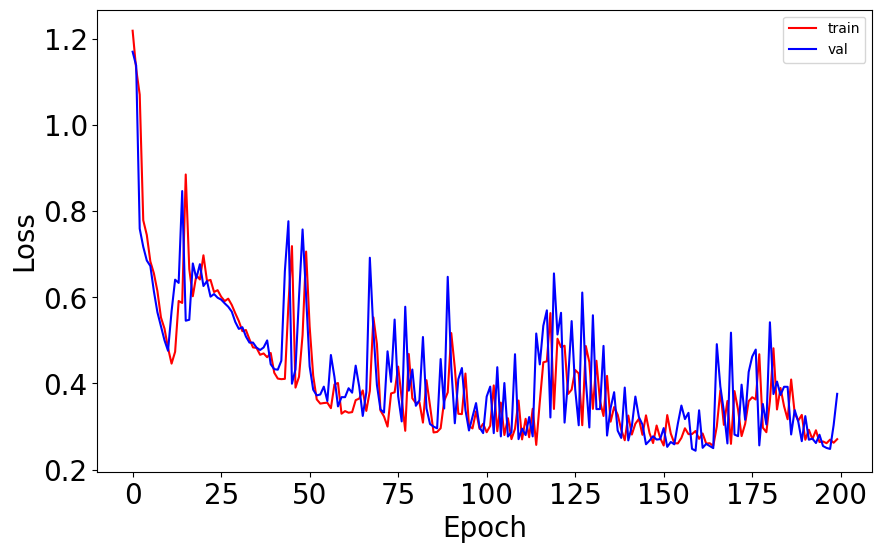

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 40ms/step


In [26]:
Y_pred

array([[5.0354940e-03, 9.8623300e-01, 8.7314956e-03],
       [9.9993491e-01, 6.5062966e-05, 4.7534730e-08],
       [1.7189804e-14, 3.6188456e-05, 9.9996376e-01],
       [2.9544150e-03, 9.8285162e-01, 1.4193923e-02],
       [7.9076011e-03, 9.8633611e-01, 5.7563097e-03],
       [9.9983692e-01, 1.6287671e-04, 1.3415534e-07],
       [1.0110618e-02, 9.8531127e-01, 4.5782002e-03],
       [1.0468214e-05, 4.4152212e-01, 5.5846745e-01],
       [1.8794900e-04, 8.5998631e-01, 1.3982581e-01],
       [1.0110618e-02, 9.8531127e-01, 4.5782002e-03],
       [4.5009827e-05, 6.7315567e-01, 3.2679933e-01],
       [9.9937123e-01, 6.2815892e-04, 6.0039542e-07],
       [9.9997699e-01, 2.3051267e-05, 1.4498852e-08],
       [9.9934894e-01, 6.5047201e-04, 6.2520769e-07],
       [9.9992311e-01, 7.6928220e-05, 5.8613182e-08],
       [8.1386883e-03, 9.8625690e-01, 5.6043174e-03],
       [4.6965648e-10, 4.8713731e-03, 9.9512863e-01],
       [1.0110618e-02, 9.8531127e-01, 4.5782002e-03],
       [2.4047722e-03, 9.805

In [27]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [28]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [29]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 39ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.950 	 0.953 	 0.950
  Test 	 0.900 	 0.925 	 0.900
